In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split


data=pd.ExcelFile('Data_Jai.xlsx')
df = data.parse("Item_Master")

In [3]:
def slice_data(start,end):
    d=pd.value_counts(df.Brand)
    brands_list=list(d[(d.values>=start) & (d.values<=end)].index)
    return brands_list

def score_accuracy(labels_predicted):
    new_df_2=new_df.assign(labels=labels_predicted)
    return pd.crosstab(new_df_2['labels'],new_df_2['Brand'])

In [21]:
fields=['Description','Brand','Business Unit','Consumer Product Size','Shlf Life Days','Gl Cat','Uni Of Mes','Itm Prc Grp','Product Form','Segment','Cmod Sub Cls','Stk Typ']
df=df[fields]
print(df.info())

print("******************************")

# Not taking 'Description' & 'Business Unit' as a factor right now 
features=['Consumer Product Size','Shlf Life Days','Gl Cat','Uni Of Mes','Itm Prc Grp','Product Form','Segment','Cmod Sub Cls','Stk Typ']
#features=['Business Unit','Consumer Product Size','Shlf Life Days','Gl Cat','Uni Of Mes','Itm Prc Grp','Product Form','Segment','Cmod Sub Cls','Stk Typ']
#features=['Description','Business Unit','Consumer Product Size','Shlf Life Days','Gl Cat','Uni Of Mes','Itm Prc Grp','Product Form','Segment','Cmod Sub Cls','Stk Typ']
targets=['Brand']

df=df.dropna()

# Get all brands which occur between 400 & 500 times in dataframe 
brands_list=slice_data(100,500)
print("Print our brands list")
print(brands_list)
print("Number of brands(targets we are looking into)")
clusters_needed=len(brands_list)
print(len(brands_list))


new_df=df[df['Brand'].isin(brands_list)]


X=new_df[features]
y=new_df[targets]

print("******************************")


print('Print Features')
print(X)

le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)
y = y.apply(le.fit_transform)
print("******************************")


print('Print Transformed Features')
print(X)

print("******************************")


print("Correlation between factors")
print(X.corr())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44117 entries, 3 to 45640
Data columns (total 12 columns):
Description              44117 non-null object
Brand                    44117 non-null object
Business Unit            44117 non-null object
Consumer Product Size    44117 non-null object
Shlf Life Days           44117 non-null int64
Gl Cat                   44117 non-null object
Uni Of Mes               44117 non-null object
Itm Prc Grp              44117 non-null float64
Product Form             44117 non-null object
Segment                  44117 non-null object
Cmod Sub Cls             44117 non-null object
Stk Typ                  44117 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 4.4+ MB
None
******************************
Print our brands list
['SFF', 'NA1', 'CEP', 'AMO', 'MVF', 'ARN', 'KYB', 'EOF', 'MGR', 'DCN', 'DTT', 'DLS', 'NA2', 'HRP', 'CLG', 'BCF', 'RDX', 'OWN', 'STP', 'GLP', 'ESY', 'OLD', 'CAS', 'DGA', 'LAA', 'SNI']
Number of brands(target

******************************
Print Transformed Features
       Consumer Product Size  Shlf Life Days  Gl Cat  Uni Of Mes  Itm Prc Grp  \
27                       152              34       1           0            0   
54                       163              37       1           0            1   
109                      163              20       1           0            1   
135                      133              49       1           0            2   
162                      152              48       1           0            0   
735                       78              26       1           0            5   
736                       78               8       1           0            5   
737                      127              37       1           0            7   
738                      155              17       1           0            9   
746                      134               0       4           0           16   
748                      196               0       

## Starting with ML 
### KMeans

In [22]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=clusters_needed)
kmeans.fit(X.values)
labels_predicted=kmeans.predict(X.values)

new_df_2=new_df.assign(labels=labels_predicted)

print(pd.crosstab(new_df_2['labels'],new_df_2['Brand']))

Brand   AMO  ARN  BCF  CAS  CEP  CLG  DCN  DGA  DLS  DTT ...   MGR  MVF  NA1  \
labels                                                   ...                   
0         0    0    0    0    0    0    0    0    0    0 ...     0    0   14   
1         0    1    0    0    0    0    0   50    0    0 ...    68  100    0   
2        14    0    0  105    0  173    0    0    0    0 ...     0    0    0   
3         0    0    0    0   42    0    0    0    8    0 ...     0    0    0   
4         0    0    0    0  109    0   52   28    0    0 ...     0    0    0   
5         0  101    9    0    0    0    2    0    0    0 ...     0    0    0   
6         0    0    0    0    0    0   59    2    0  122 ...     4    6   10   
7         0    0    0    0   31    0    0    0   26    0 ...     0    0  212   
8         0    0    0    0   12    0    0    0   15    0 ...     0    0    0   
9         0    0   11    6    0    0    0    0    8   16 ...     0    0   37   
10       51    4    0    0    0    0    

### SVM

In [23]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.5,random_state=42)
clf = svm.SVC(gamma='scale')
scores = cross_val_score(clf, X_train, y_train.ravel(), cv=10)
print(scores)

clf.fit(X_train, y_train.ravel())
print(clf.score(X_test,y_test.ravel()))

labels_predicted=clf.predict(X.values)
score_accuracy(labels_predicted)

[0.86753247 0.85117493 0.84084881 0.87096774 0.87061995 0.81571816
 0.86103542 0.85245902 0.8815427  0.88919668]
0.8672947510094212


Brand,AMO,ARN,BCF,CAS,CEP,CLG,DCN,DGA,DLS,DTT,...,MGR,MVF,NA1,NA2,OLD,OWN,RDX,SFF,SNI,STP
labels,,,,,,,,,,,,,,,,,,,,,
0,423,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,416,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,4,0,1
2,0,0,184,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,7,165,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,383,0,0,0,17,0,...,0,0,3,0,0,3,0,0,0,8
5,0,0,0,0,0,213,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,348,0,0,4,...,0,0,0,3,0,3,0,0,0,0
7,0,0,0,0,0,0,0,122,0,0,...,15,2,0,0,0,0,0,10,0,0
8,0,0,0,0,5,0,0,0,289,2,...,0,0,0,2,0,0,0,0,0,0


### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(max_depth=clusters_needed)
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))


labels_predicted=model.predict(X.values)
score_accuracy(labels_predicted)

1.0
0.9294763314121279


Brand,AMO,ARN,BCF,CAS,CEP,CLG,DCN,DGA,DLS,DTT,...,MGR,MVF,NA1,NA2,OLD,OWN,RDX,SFF,SNI,STP
labels,,,,,,,,,,,,,,,,,,,,,
0.0,425,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1.0,0,418,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,195,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3.0,0,0,0,165,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,423,0,0,0,2,0,...,0,0,2,0,0,0,0,0,0,2
5.0,0,0,0,0,0,213,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,0,0,0,0,350,0,0,0,...,0,0,4,5,0,0,2,0,0,0
7.0,0,0,0,0,0,0,0,161,0,0,...,0,0,0,0,0,0,0,3,0,0
8.0,0,0,0,0,2,0,0,0,326,0,...,0,0,7,0,0,0,0,0,0,0


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=1)
rfr.fit(X_train, y_train.ravel())

# Look at the R^2 scores on train and test
print(rfr.score(X_train, y_train.ravel()))
print(rfr.score(X_test, y_test.ravel()))



labels_predicted=rfr.predict(X.values)
score_accuracy(labels_predicted)

0.9658673802729356
0.9062126796961286


Brand,AMO,ARN,BCF,CAS,CEP,CLG,DCN,DGA,DLS,DTT,...,MGR,MVF,NA1,NA2,OLD,OWN,RDX,SFF,SNI,STP
labels,,,,,,,,,,,,,,,,,,,,,
0.0,411,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,8,412,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2.0,0,0,189,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3.0,0,0,0,165,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,5,0,416,0,0,0,4,0,...,0,0,2,0,0,2,0,0,0,2
5.0,2,0,0,0,0,213,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,0,0,0,0,350,0,0,0,...,0,0,0,5,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,160,0,0,...,2,0,0,0,0,0,0,5,0,0
8.0,0,0,0,0,0,0,0,0,323,0,...,0,0,6,0,0,0,0,0,0,0


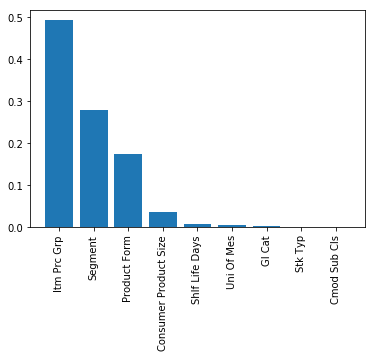

In [26]:
importances=rfr.feature_importances_
sorted_index=np.argsort(importances)[::-1]
x=range(len(importances))

labels=np.array(features)[sorted_index]
plt.bar(x,importances[sorted_index],tick_label=labels)

plt.xticks(rotation=90)
plt.show()